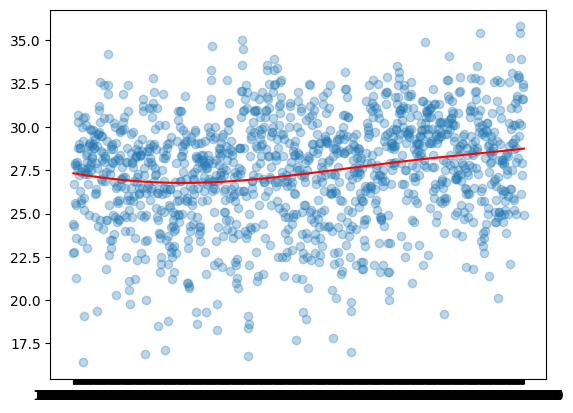

In [25]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f=open('1981.csv', 'r', encoding='cp949')
data=csv.reader(f)
header6=next(data)

june_date = []
july_date = []
august_date = []

june_temp = []
july_temp = []
august_temp = []

for row in data:

    if row[-1] != '':
        date=row[0].split('-')
        year = date[0]
        month = date[1]
        day = date[2]

        if month == '06':
            june_date.append(row[0])
            june_temp.append(float(row[-1]))

        elif month == '07':
            july_date.append(row[0])
            july_temp.append(float(row[-1]))

        elif month == '08':
            august_date.append(row[0])
            august_temp.append(float(row[-1])) #산포도 x,y축 값 리스트 확보 완

f.close()

x=[]
#print(len(june_temp))
for i in range(1320):
    x.append(i)

y=june_temp

poly = np.polyfit(x, y, 5) # 5, 4, 3, 2, 1차, 상수항 계수가 순서대로 들어있는 배열
x_line = np.linspace(1, 1320, 1320) # 곡선을 완만하게 그리기 위한 linspace 객체 선언

y_pred = np.zeros_like(x_line) # 예측 값을 구하기 위해 모든 값이 0인 배열 선언

for i in range(6): # 5, 4, 3, 2, 1차, 상수항에 대한 값들을 for문으로 더해서 계산
    y_pred += x_line ** (5 - i) * poly[i]


plt.scatter(june_date, june_temp, alpha=0.3)
plt.plot(x_line, y_pred, color = 'r')


